<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 141.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 181.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 141.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 174.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 161.0 MB/s eta 0:00:00


##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [42]:
## Write your code here
df.describe()
df.duplicated()
df.drop_duplicates(inplace=True)

0        False
1        False
2        False
3        False
4        False
         ...  
65432    False
65433    False
65434    False
65435    False
65436    False
Length: 65437, dtype: bool

### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [13]:
## Write your code here
missing_values = df.isnull().sum()
print(missing_values)
# Filter only columns with missing values
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64
RemoteWork             10631
CodingActivities       10971
EdLevel                 4653
LearnCode               4949
LearnCodeOnline        16200
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 109, dtype: int64


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



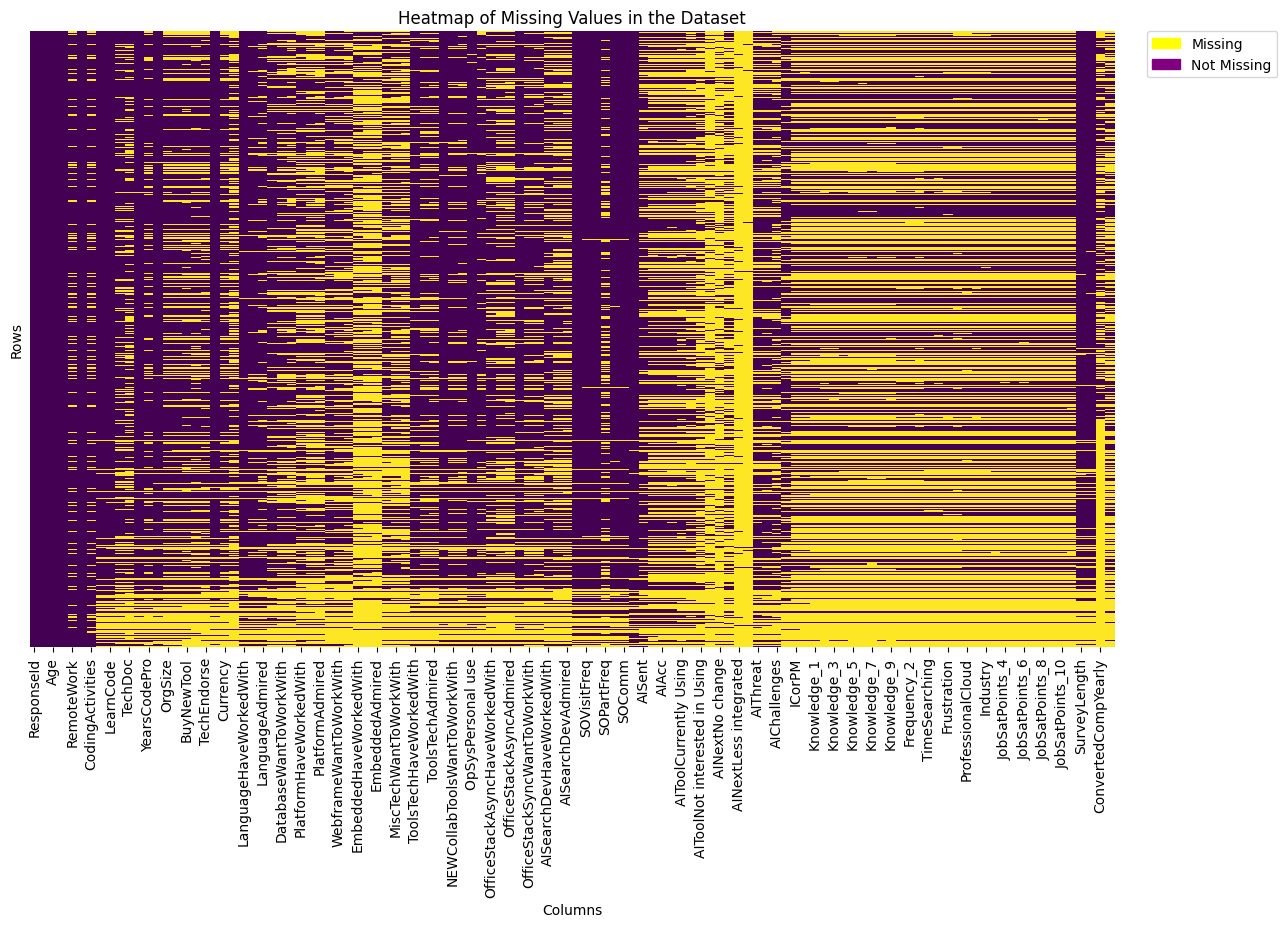

In [23]:
import matplotlib.patches as mpatches
## Write your code here
plt.figure(figsize=(14, 8))
sns.heatmap(df.isnull(), 
            cbar=False, 
            cmap="viridis", 
            yticklabels=False)

missing_patch = mpatches.Patch(color='yellow', label='Missing')
not_missing_patch = mpatches.Patch(color='purple', label='Not Missing')
plt.legend(handles=[missing_patch, not_missing_patch], loc='upper right', bbox_to_anchor=(1.15, 1), borderaxespad=0.)

plt.title("Heatmap of Missing Values in the Dataset")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [25]:
## Write your code here
missing_employment = df['Employment'].isnull().sum()

print(f"Number of missing rows in 'Employment' column: {missing_employment}")

missing_LearnCode = df['LearnCode'].isnull().sum()

print(f"Number of missing rows in 'LearnCode' column: {missing_LearnCode}")


Number of missing rows in 'Employment' column: 0
Number of missing rows in 'LearnCode' column: 4949


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [35]:
## Write your code here

mostFrequent_Employment=df['Employment'].mode()[0]
print('most frequent (majority) value in Employment is :',mostFrequent_Employment)


most frequent (majority) value in Employment is : Employed, full-time


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [37]:
## Write your code here
df.fillna({'Employment':mostFrequent_Employment},inplace=True)

### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


employment_counts: Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work

/tmp/ipykernel_301/2129217195.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


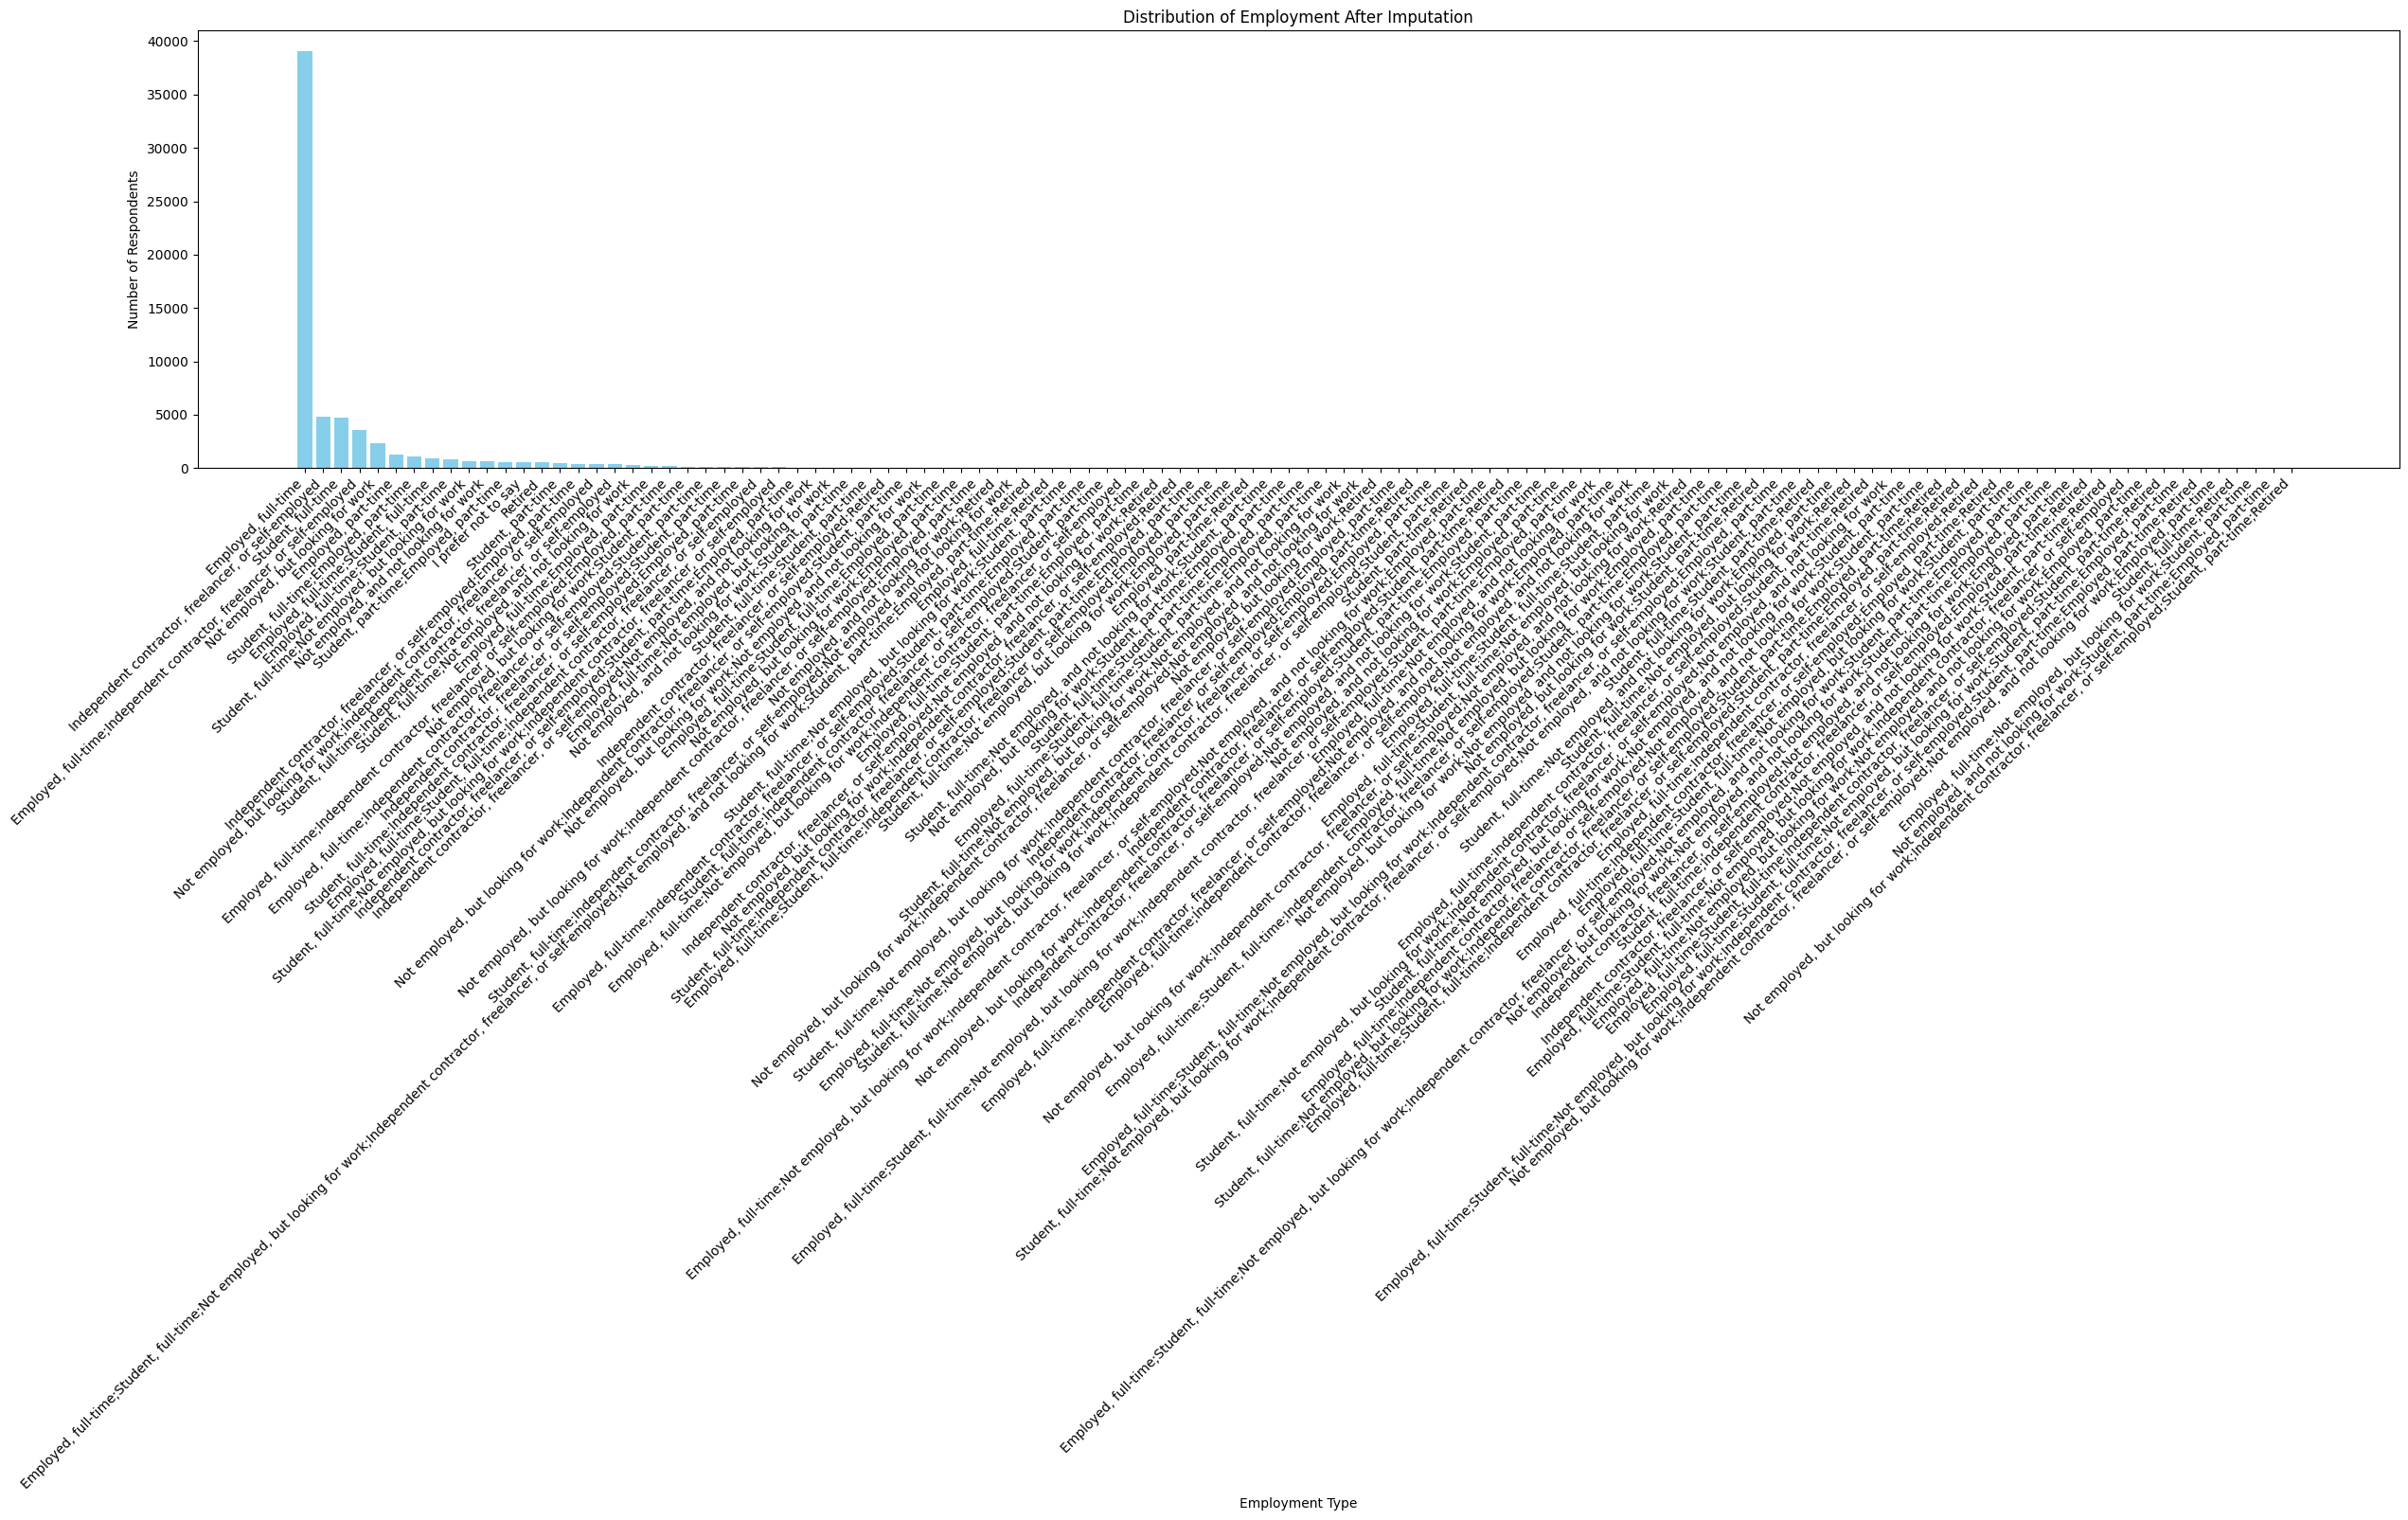

In [41]:
## Write your code here
employment_counts = df['Employment'].value_counts()
print('employment_counts:',employment_counts)
# Plot the bar chart
plt.figure(figsize=(30, 6))
plt.bar(employment_counts.index, employment_counts.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Employment After Imputation')
plt.xlabel('Employment Type')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
